In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
from feature_engine.selection import (
    SmartCorrelatedSelection, 
    RecursiveFeatureElimination, 
)

In [3]:
data = pd.read_parquet(
    'd:/uber-taxi-demand/data/yellow_trip_features_v3.parquet'
)

In [4]:
data.head().T

,0,1,2,3,4
passengerDemand,2288,1594,1047,776,527
taxiDemand,1483,1016,703,502,357
timestamp,2022-01-02 00:00:00,2022-01-02 01:00:00,2022-01-02 02:00:00,2022-01-02 03:00:00,2022-01-02 04:00:00
timestamp_month,1,1,1,1,1
timestamp_quarter,1,1,1,1,1
timestamp_semester,1,1,1,1,1
timestamp_week,52,52,52,52,52
timestamp_day_of_week,6,6,6,6,6
timestamp_day_of_month,2,2,2,2,2
timestamp_day_of_year,2,2,2,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8713 entries, 0 to 8712
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   passengerDemand                  8713 non-null   int64         
 1   taxiDemand                       8713 non-null   int64         
 2   timestamp                        8713 non-null   datetime64[ns]
 3   timestamp_month                  8713 non-null   int32         
 4   timestamp_quarter                8713 non-null   int32         
 5   timestamp_semester               8713 non-null   int64         
 6   timestamp_week                   8713 non-null   int64         
 7   timestamp_day_of_week            8713 non-null   int32         
 8   timestamp_day_of_month           8713 non-null   int32         
 9   timestamp_day_of_year            8713 non-null   int32         
 10  timestamp_weekend                8713 non-null   int64      

In [6]:
df = data.copy()

<center><b> Correlation </b></center>

In [7]:
corr = df.corr()[['passengerDemand','taxiDemand']]

<Axes: >

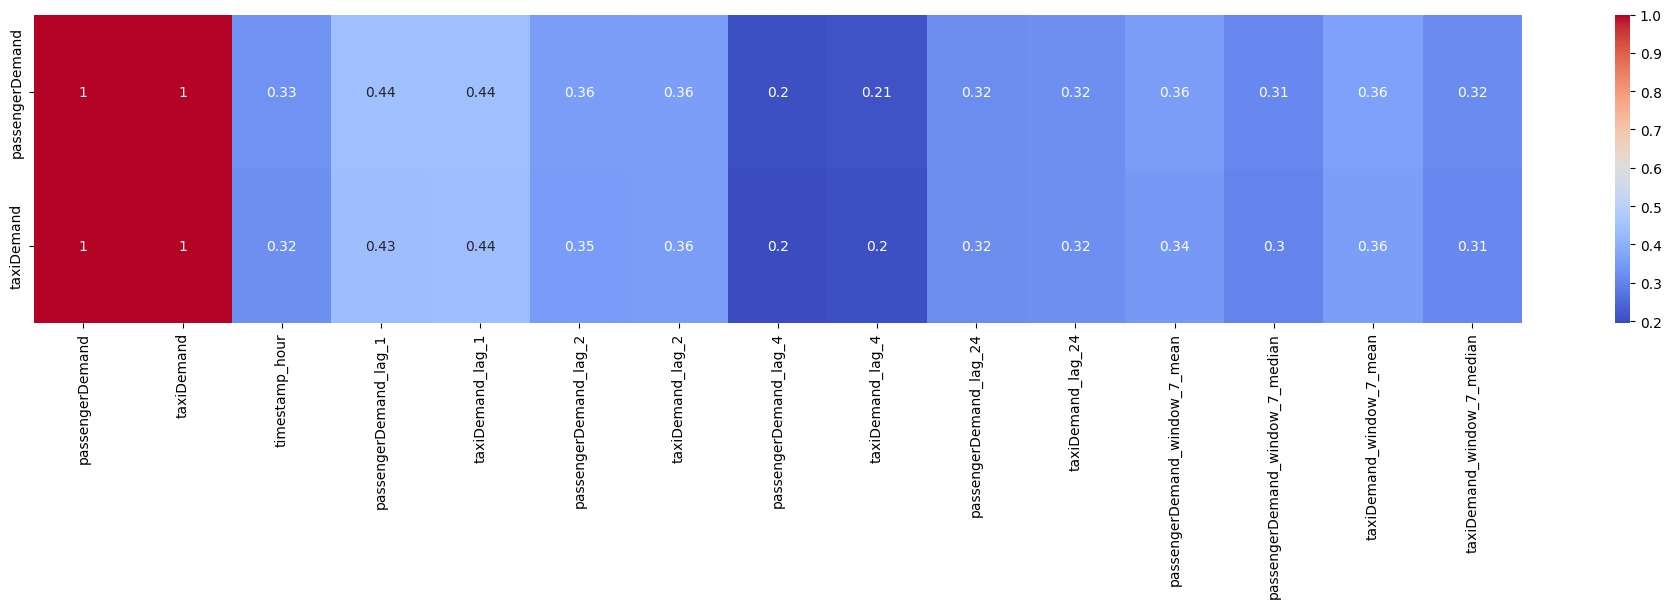

In [8]:
plt.figure(figsize=(24, 4))
sns.heatmap(
    corr.loc[(corr.passengerDemand>0.2) | (corr.taxiDemand>0.2)].T,
    annot=True, cmap='coolwarm'
)

<center><b> Feature Selection </b></center>

In [9]:
def select_best_features(df):
    ### feature, target split
    X = df.drop(columns=['timestamp','passengerDemand', 'taxiDemand'])
    y = df['taxiDemand']
    
    ### smart correlated selection
    scs = SmartCorrelatedSelection(
        variables=None, method='pearson', threshold=0.5, 
        missing_values='ignore', selection_method='variance', 
        confirm_variables=False
    )
    scs_columns = set(scs.fit_transform(X).columns)
    
    
    ### recursive FE
    rfe = RecursiveFeatureElimination(
        DecisionTreeRegressor(max_depth=3), scoring='r2', cv=3, threshold=0.01, 
        variables=None, confirm_variables=False
    )
    
    rfe_columns = rfe.fit_transform(X, y)
    scs_columns.update(rfe_columns)
    
    return scs_columns

In [10]:
X = df.drop(columns=['timestamp','passengerDemand', 'taxiDemand'])
y = df['taxiDemand']

In [11]:
scs = SmartCorrelatedSelection(
        variables=None, method='pearson', threshold=0.5, 
        missing_values='ignore', selection_method='variance', 
        confirm_variables=False
    )

In [12]:
scs.fit_transform(X).columns

Index(['timestamp_day_of_week', 'timestamp_day_of_month',
       'timestamp_month_start', 'timestamp_month_end', 'timestamp_year_start',
       'timestamp_year_end', 'timestamp_hour', 'passengerDemand_lag_1',
       'passengerDemand_lag_2', 'passengerDemand_lag_4',
       'passengerDemand_lag_8', 'passengerDemand_lag_16',
       'passengerDemand_lag_24', 'passengerDemand_window_7_std',
       'passengerDemand_expanding_std'],
      dtype='object')

In [13]:
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [14]:
rfe = RecursiveFeatureElimination(
    dt, scoring='r2', cv=3, threshold=0.01, 
    variables=None, confirm_variables=False
)

In [15]:
rfe.fit_transform(X, y)

,timestamp_month,timestamp_quarter,timestamp_semester,timestamp_day_of_month,timestamp_day_of_year,timestamp_month_start,timestamp_month_end,timestamp_quarter_end,timestamp_year_end,timestamp_hour,taxiDemand_lag_1,passengerDemand_lag_8,taxiDemand_lag_8,taxiDemand_lag_16,taxiDemand_window_7_mean,taxiDemand_window_7_std,taxiDemand_window_7_median,passengerDemand_expanding_std,taxiDemand_expanding_std
0,1,1,1,2,2,0,0,0,0,0,1823.0,5754.0,3633.0,849.0,2949.857143,697.310172,2703.0,1926.172935,1205.114420
1,1,1,1,2,2,0,0,0,0,1,1483.0,5881.0,3666.0,1254.0,2638.000000,803.686713,2696.0,1920.277885,1202.350631
2,1,1,1,2,2,0,0,0,0,2,1016.0,5875.0,3731.0,1820.0,2250.142857,842.484110,2573.0,1941.251618,1218.176200
3,1,1,1,2,2,0,0,0,0,3,703.0,5296.0,3457.0,2351.0,1856.714286,827.880973,1823.0,1983.175723,1245.527741
4,1,1,1,2,2,0,0,0,0,4,502.0,4214.0,2696.0,2952.0,1543.285714,871.350430,1483.0,2029.912596,1277.481912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,12,4,2,30,364,0,0,0,0,20,0.0,0.0,0.0,565.0,3594.142857,3371.763111,5779.0,4010.886940,2881.183157
8709,12,4,2,30,364,0,0,0,0,21,0.0,8689.0,5779.0,0.0,2768.571429,3454.128055,0.0,4010.818937,2881.134922
8710,12,4,2,30,364,0,0,0,0,22,0.0,0.0,0.0,0.0,2768.571429,3454.128055,0.0,4010.750912,2881.086670
8711,12,4,2,30,364,0,0,0,0,23,4547.0,9672.0,6382.0,0.0,2506.428571,3194.028640,0.0,4010.719600,2881.011344


In [16]:
best = select_best_features(df)

In [17]:
best

{'passengerDemand_expanding_std',
 'passengerDemand_lag_1',
 'passengerDemand_lag_16',
 'passengerDemand_lag_2',
 'passengerDemand_lag_24',
 'passengerDemand_lag_4',
 'passengerDemand_lag_8',
 'passengerDemand_window_7_std',
 'timestamp_day_of_month',
 'timestamp_day_of_week',
 'timestamp_hour',
 'timestamp_month_end',
 'timestamp_month_start',
 'timestamp_year_end',
 'timestamp_year_start'}

In [18]:
v4 = df[['timestamp', 'taxiDemand']+list(best)]

In [19]:
v4.head().T

,0,1,2,3,4
timestamp,2022-01-02 00:00:00,2022-01-02 01:00:00,2022-01-02 02:00:00,2022-01-02 03:00:00,2022-01-02 04:00:00
taxiDemand,1483,1016,703,502,357
timestamp_day_of_week,6,6,6,6,6
passengerDemand_window_7_std,1132.856188,1264.258469,1292.484006,1294.830068,1351.861486
passengerDemand_expanding_std,1926.172935,1920.277885,1941.251618,1983.175723,2029.912596
passengerDemand_lag_8,5754.0,5881.0,5875.0,5296.0,4214.0
passengerDemand_lag_24,6838.0,7738.0,5974.0,4107.0,2485.0
timestamp_year_start,0,0,0,0,0
timestamp_month_end,0,0,0,0,0
passengerDemand_lag_1,2798.0,2288.0,1594.0,1047.0,776.0


In [20]:
v4.to_parquet('d:/uber-taxi-demand/data/yellow_trip_features_v4.parquet', index=False)